In [1]:
#EasyLang to Python : Homework 1 

#Part1 : Importing the libraries required
import pandas as pd
import csv
import matplotlib.pyplot as plt
import math
import talib as talib
%pylab inline
%matplotlib inline


Populating the interactive namespace from numpy and matplotlib


In [2]:
# Part 2 : Reading the data from the file  
try:

    mkdata=pd.read_csv("C:/Users/Mikayla/Desktop/USRaw.txt", index_col =0, parse_dates=True) #Reading the data from a file on my desktop and saving loading them into filedata1
    print(mkdata.tail()) # printing out the data just to make sure we actually have some data in filedata1 
except:
    print("MkErrorr")
      
    

             Time       Open       High        Low      Close      Up    Down
Date                                                                         
2020-07-20  14:00  179.68750  180.46875  179.68750  180.18750   82667   81960
2020-07-21  14:00  180.25000  180.62500  179.84375  180.34375   92510   78915
2020-07-22  14:00  180.34375  181.00000  180.25000  180.53125   99732  116722
2020-07-23  14:00  180.53125  181.31250  180.50000  181.25000  115017  113144
2020-07-24  14:00  181.28125  181.93750  180.71875  181.03125  123370  104883


In [3]:
#Part 3: Creating an MKTrend function (Which allows me to call it multiple times if i want to )
def MKTrend(alpha,mkdf) :
    smooth=0 #initiating variables that we can use in the function
    last_price=0 #used for Price[1]
    scnd2last_price=0; #used for Price[2]
        
    last_itrend=0 #used for ITrend[1]
    scnd2last_itrend=0; #used for ITrend[2]
       
    mkdf['Price']=(mkdf['High']+mkdf['Low'])/2 #defining the price
    #mkdf['Calculated_ITrend']=float(0)
    #mkdf['Calculated_Trigger']=float(0)
    
    itr=0 #iterator starting at zero
    currentbar=0 
    for index,row in mkdf.iterrows():
        
        try:
            ITrend= (alpha - alpha * alpha/4) *row['Price'] +0.5*alpha*alpha*last_price-(alpha-0.75*alpha*alpha)* scnd2last_price +2*(1-alpha)*last_itrend-(1-alpha)* (1-alpha)*scnd2last_itrend
        except:
            print("MkError in the ITrend formation")
            currentbar=row-itr# the current bar is equal to the live bar minus the iterations weve done.
        if currentbar<7 :
                ITrend=(row['Price'] + 2*last_price + scnd2last_price)/4
            
        Trigger=2*ITrend-scnd2last_itrend
        
        
        mkdf.loc[index,'Calculated_ITrend'] = round (ITrend,2) #rounding up the results
        mkdf.loc[index,'Calculated_Trigger'] = round (Trigger,2)
          #instead of using a list , im just using simple variables   
        scnd2last_itrend=last_itrend #MKmagic
        scnd2last_price=last_price
        last_itrend=ITrend
        last_price=row['Price']
        itr=itr+1
                    
#end of function

In [4]:
#Part 4 : Executing the function 
MKTrend(0.07,mkdata)

In [5]:
#Part 5 : Showing the results 
print(mkdata.tail()) #tail is plotting the data inverted 

             Time       Open       High        Low      Close      Up    Down  \
Date                                                                            
2020-07-20  14:00  179.68750  180.46875  179.68750  180.18750   82667   81960   
2020-07-21  14:00  180.25000  180.62500  179.84375  180.34375   92510   78915   
2020-07-22  14:00  180.34375  181.00000  180.25000  180.53125   99732  116722   
2020-07-23  14:00  180.53125  181.31250  180.50000  181.25000  115017  113144   
2020-07-24  14:00  181.28125  181.93750  180.71875  181.03125  123370  104883   

                 Price  Calculated_ITrend  Calculated_Trigger  
Date                                                           
2020-07-20  180.078125             180.05              180.23  
2020-07-21  180.234375             180.12              180.31  
2020-07-22  180.625000             180.29              180.53  
2020-07-23  180.906250             180.60              181.08  
2020-07-24  181.328125             180.94       

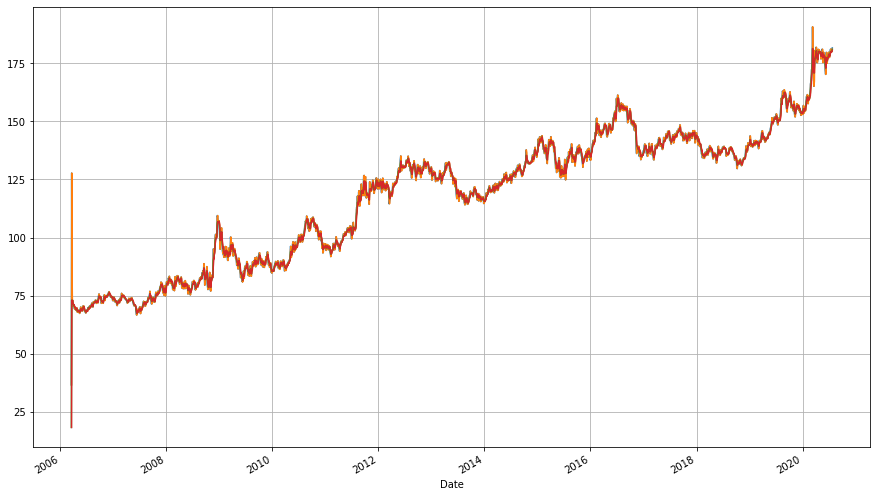

In [6]:
#Part 6 : Plots

pylab.rcParams['figure.figsize']=(15,9)
mkdata['Calculated_Trigger'].plot(grid=True)
mkdata['Calculated_Trigger'].shift(1).plot(grid=True)



pylab.rcParams['figure.figsize']=(15,9)
mkdata['Calculated_ITrend'].plot(grid=True)
mkdata['Calculated_ITrend'].shift(1).plot(grid=True)
